In [2]:
import os

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

from IPython.display import clear_output

from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
percentili = {0.1:0,0.2:0,0.3:0,0.4:0,0.5:0,0.6:0,0.7:0,0.8:0,0.9:0,1.0:0}
for i in range(13):
    temp_perc = dict(np.load('data/get_edges/percentile/percentili_{}.npy'.format(i),allow_pickle=True).tolist())
    for percentile in percentili.keys():
        percentili[percentile] += temp_perc[percentile]

In [4]:
percentili

{0.1: 7243130,
 0.2: 33995285,
 0.3: 24488791,
 0.4: 4287285,
 0.5: 1507306,
 0.6: 817820,
 0.7: 293547,
 0.8: 81080,
 0.9: 20275,
 1.0: 1527310}

In [5]:
print('Printing ECDF')
sums = 0
arr_sums=[]
for idx, percentile in enumerate(percentili.values()):
    sums += percentile
    if idx == 9:
        print('vaues <= 0.1:\t{}'.format(sums))
        arr_sums.append(sums)
    else:
        print('vaues <= 0.{}9:\t{}'.format(idx, sums))
        arr_sums.append(sums)

Printing ECDF
vaues <= 0.09:	7243130
vaues <= 0.19:	41238415
vaues <= 0.29:	65727206
vaues <= 0.39:	70014491
vaues <= 0.49:	71521797
vaues <= 0.59:	72339617
vaues <= 0.69:	72633164
vaues <= 0.79:	72714244
vaues <= 0.89:	72734519
vaues <= 0.1:	74261829


In [6]:
x = np.arange(0.09,1.0,0.1)

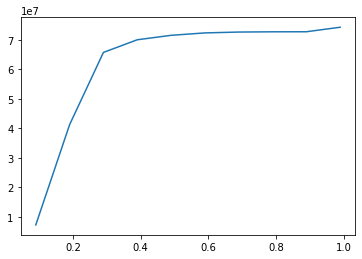

In [7]:
plt.plot(x,arr_sums)

# potrei prendere i valori maggiori di 0.6

In [8]:
74261829-72339617 #link totali

1922212

In [9]:
74261829*20/100

14852365.8